### 170221T - Answer Workbook

# 1. 2-D Transforms

In [152]:
def plot_points(points,  color2='#ff00cc', text=''):
    color1='#000000'
    '''
        Accepts set of points, and joins them with lines
        
    Args: points array consisting of x,y,xt,yt points
    '''
    
    x = points[0]
    y = points[1]
    xt = points[2]
    yt = points[3]
    
    fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
    ax.plot(x, y, color=color1, alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    ax.set_aspect('equal')
    ax.set_xlim(-3, 2)
    
    ax.set_ylim(-2, 2)

    ax.plot(xt, yt, color=color2, alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2,label=text)
    ax.set_aspect('equal')
    ax.legend(loc="lower right")
    
    #fig.savefig(text+'.eps', format='eps')

In [153]:
def apply_transformation(H,P):
    '''
        Applies a transformation provided H, to set of points listed
        in P.
        P are in homogenoues coordinates.

    Args: H -> Transformation (3x3 matrix)
    
    Returns: None, Plots the resulting transformation
        
    '''
    
    Pt = np.matmul(H, P) #apply transformation

    P = P/P[-1, :] #convert to image coordinates
    P = np.insert(P,4,P[:,0],axis=1)  #for plotting purposes (lines)
    x = P[0, :]
    y = P[1, :]

    Pt = Pt/Pt[-1, :] #convert to image coordinates
    Pt = np.insert(Pt,4,Pt[:,0],axis=1)  #for plotting purposes (lines)
    xt = Pt[0, :]
    yt = Pt[1, :]

    return x,y,xt,yt

[[0 0 1 1]
 [0 1 1 0]
 [1 1 1 1]]


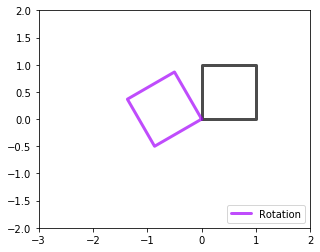

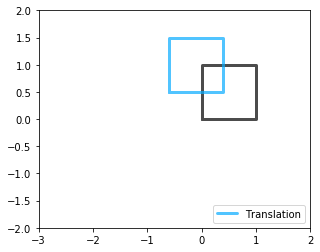

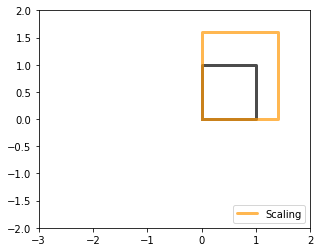

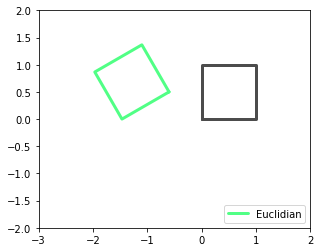

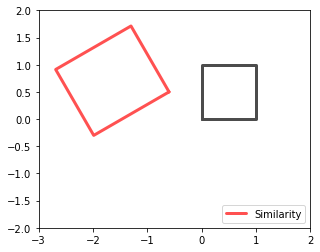

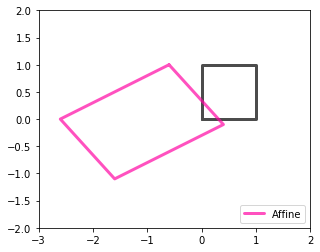

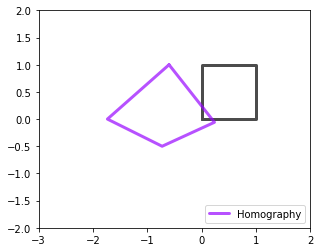

In [154]:
import matplotlib.pyplot as plt
import numpy as np
import string

# points a, b and, cvi
a, b, c, d = (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)

# matrix with row vectors of points
P = np.array([a, b, c, d]).T
print(P)

'''H = np.identity(3)
H[0,0] = 2
H[1,1] = 2
H[2, 0] = 0.3
H[2, 1] = 0.5
'''

t =  2* np.pi/3 
R = [[np.cos(t), -np.sin(t), 0.], [np.sin(t), np.cos(t), 0.], [0., 0., 1.]] #rotation


t1,t2 = -0.6,0.5
T = [[1, 0, t1], [0, 1, t2], [0, 0, 1]] #translation

s1,s2 = 1.4,1.6
S = [[s1, 0, 0], [0, s2, 0], [0, 0, 1]] #scalling

Euclidian = [[np.cos(t), -np.sin(t), t1], [np.sin(t), np.cos(t), t2], [0., 0., 1.]] #euclidian
Similarity = [[s1*np.cos(t), -s2*np.sin(t), t1], [s1*np.sin(t), s2*np.cos(t), t2], [0., 0., 1.]] #similarity

plot_points(apply_transformation(R,P),'#A400FB','Rotation');  #rotation
plot_points(apply_transformation(T,P),'#07ACFF','Translation');  #translation
plot_points(apply_transformation(S,P),'#FF9907','Scaling');  #scalling


plot_points(apply_transformation(Euclidian,P),'#07FF52','Euclidian'); #euclidian transformation = Rot + Trans
plot_points(apply_transformation(Similarity,P),'#FF0707','Similarity'); #Similarity transformation = Rot + Trans + Scale

Affine = [[1, -2, -0.6], [-1.1, -1, 1], [0, 0, 1]] #Affine
plot_points(apply_transformation(Affine,P),'#FF07A5','Affine');

Homography = [[1, -2, -0.6], [-1.1, -1, 1], [0.7, 0.5, 1]] #Affine
plot_points(apply_transformation(Homography,P),'#9907FF','Homography');

# 2. Warping Using a Given Homography

In [ ]:
import cv2 as cv
import numpy as np

im1 = cv.imread('images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('images/graf/img5.ppm', cv.IMREAD_ANYCOLOR)

   
with open('images/graf/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]       
print(H)
H = np.array(H)



im5_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1600,640))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5", im5)
cv.waitKey(0)
cv.namedWindow("Image 5 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5 Warped", im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()


[[0.62544644, 0.057759174, 222.01217], [0.22240536, 1.1652147, -25.605611], [0.00049212545, -3.6542424e-05, 1.0]]


# 3. Computing the Homogrpahy Using Mouse-Clicked Points and Warping

In [1]:
import cv2 as cv
import numpy as np


N = 5
global n 
n = 0    
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
          

im1 = cv.imread('images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()
   

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


print(p1)
print(p2)

h, status = cv.findHomography(p2, p1)
print(h)
im4_warped = cv.warpPerspective(im4, h, (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1


#cv.imshow("Image 4 Warped", im4_warped)

#cv.imwrite('img2-h-jo.jpg',im4_warped)

[[333. 194.]
 [526. 223.]
 [516. 348.]
 [627. 415.]
 [611.  86.]]
[[282. 252.]
 [385. 239.]
 [453. 341.]
 [529. 367.]
 [344. 113.]]
[[ 1.26773992e+00 -9.98208707e-01  1.93962930e+02]
 [ 2.38229631e-01  8.34958271e-01 -1.03281826e+02]
 [-5.02433228e-04  1.64139526e-04  1.00000000e+00]]


In [2]:
h, status = cv.findHomography(p2, p1)
print(h)
im4_warped = cv.warpPerspective(im4, h, (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1


cv.imshow("Image 4 Warped", im4_warped)

[[ 1.26773992e+00 -9.98208707e-01  1.93962930e+02]
 [ 2.38229631e-01  8.34958271e-01 -1.03281826e+02]
 [-5.02433228e-04  1.64139526e-04  1.00000000e+00]]


In [3]:
cv.imwrite('img2 - part3.jpg',im4_warped)

True

In [36]:
h= find_homography(p2,p1)

print(h)

[[-5.72636108e-03  3.75178556e-03 -7.85230265e-01]
 [-1.03342473e-03 -4.62247490e-03  6.19131690e-01]
 [ 3.17377327e-06 -2.97536837e-06 -4.48087447e-03]]


# 4. Computing the Homogrpahy Using Mouse-Clicked Points without OpenCV

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

N = 5
global n 
n = 0    
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
          

im1 = cv.imread('images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()
   

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


print(p1)
print(p2)

cv.destroyAllWindows()

h = find_homography(p2,p1) ######## my function to find homography

im4_warped = cv.warpPerspective(im4, h, (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1


fn = 'im4-warped_custom-homography.jpg'
cv.imwrite(fn,im4_warped)

imgo= cv.imread(fn)
imgo= cv.cvtColor(imgo, cv.COLOR_BGR2RGB)
plt.imshow(imgo)
plt.title("Homography computed using minimum eigenvalue")

[[334. 194.]
 [405. 209.]
 [527. 225.]
 [612.  88.]
 [629. 413.]]
[[283. 255.]
 [325. 252.]
 [386. 240.]
 [345. 116.]
 [530. 365.]]


Text(0.5, 1.0, 'Homography computed using minimum eigenvalue')

#### My function to find homography matrix H

In [25]:
import numpy as np
def find_homography(p_src, p_dst):
    '''
        Accepts source point list and destination point list & finds homography
        
    returns:
        [3x3  Homogrpahy matrix]
    '''
    M=[]
    z = np.zeros((1,3))  #1x3 zero vector
    for i in range(0,len(p_src)):
        
        x_i  = np.append(p_src[i],1) #xi vector
        x_i_ = p_dst[i][0] #xi' coordinate
        y_i_ = p_dst[i][1] #yi' coordinate
        
        row1 = np.append(np.append(z, -x_i), y_i_*x_i)
        row2 = np.append(np.append(x_i,z)  , -x_i_*x_i)
        
        M += [row1] + [row2]
    
    A = np.array(M)
    w,v = np.linalg.eig(np.matmul(A.T,A))
    
    idx = w.argsort()[::-1]   #sort eigenvalues in descending order
    v = v[:,idx]
    
    return v[:,-1].reshape((3,3)) #return ei.vector corresponding to smallest eigen value

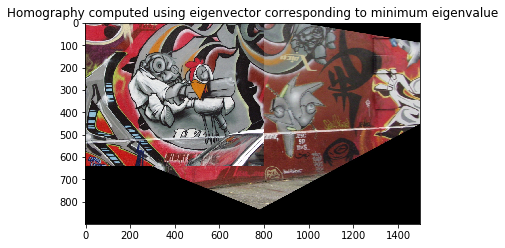

In [30]:
h = find_homography(p2,p1) ## my function to find homography

im4_warped = cv.warpPerspective(im4, h, (1500,900))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1


fn = 'im4-warped_custom-homography.jpg'
cv.imwrite(fn,im4_warped)

imgo= cv.imread(fn)
imgo= cv.cvtColor(imgo, cv.COLOR_BGR2RGB)
plt.imshow(imgo)
plt.title("Homography computed using eigenvector corresponding to minimum eigenvalue")
plt.savefig('homo.png', format='png')

### Part 5 : BONUS: Stitch more than two images using mouse clicked points

In [91]:
def stitch(img1,img2,k_):
    global part
    N = 5
    global n 
    n = 0    
    p1 = np.empty((N,2))
    p2 = np.empty((N,2))

    # mouse callback function
    def draw_circle(event,x,y,flags,param):
        global n
        p = param[0]
        if event == cv.EVENT_LBUTTONDOWN:
            cv.circle(param[1],(x,y),5,(255,0,0),-1)        
            p[n] = (x,y)
            n += 1


    im1 = cv.imread(img1, cv.IMREAD_ANYCOLOR)
    im4 = cv.imread(img2, cv.IMREAD_ANYCOLOR)

    im1copy = im1.copy()
    im4copy = im4.copy()


    cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

    param = [p1, im1copy]
    cv.setMouseCallback('Image 1',draw_circle, param)

    while(1):
        cv.imshow("Image 1", im1copy)
        if n == N:
            break
        if cv.waitKey(20) & 0xFF == 27:
            break


    param = [p2, im4copy]
    n = 0
    cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
    cv.setMouseCallback('Image 4',draw_circle, param)

    while(1):
        cv.imshow("Image 4", im4copy)
        if n == N:
            break
        if cv.waitKey(20) & 0xFF == 27:
            break

    print(p1)
    print(p2)
    
    cv.destroyAllWindows()
    
    h, status = cv.findHomography(p2, p1)
    print(h)
    part = cv.warpPerspective(im4, h, (640*(k_+1),480))
    
    right_bound=(640*(k_+1))

    for i in range(right_bound-1,0,-1):
        count=0;
        for j in range(0,480):
            if(sum(part[j,i])==0):
                count+=1;
        if(count<50):
            right_bound=i
            break

    part[0:im1.shape[0], 0:im1.shape[1]] = im1
    cv.imwrite('yosmete.jpg',part[:,0:right_bound])

In [ ]:
import cv2 as cv
import numpy as np

stitch('images/yosemite1.jpg','images/yosemite2.jpg',1)
stitch('yosmete.jpg','images/yosemite3.jpg',2)

[[438. 465.]
 [485. 439.]
 [497. 415.]
 [374. 186.]
 [ 83. 222.]]
[[159. 467.]
 [205. 437.]
 [221. 417.]
 [ 94. 185.]
 [162.  85.]]
[[-2.23705379e+00 -6.73065655e-01  4.36001036e+02]
 [-1.23610358e+00 -7.76260904e-01  3.10099915e+02]
 [-3.93335301e-03 -1.94445497e-03  1.00000000e+00]]


[[700. 398.]
 [720. 302.]
 [697. 152.]
 [850. 170.]
 [897. 188.]]
[[ 85. 408.]
 [103. 314.]
 [ 76. 168.]
 [219. 197.]
 [266. 212.]]
[[ 1.14056784e+00  1.15315254e-01  6.17174520e+02]
 [-6.30443335e-02  1.15285162e+00 -3.20991896e+01]
 [ 3.03970308e-05  2.10229895e-04  1.00000000e+00]]


### Part 6 

In [1]:
import matplotlib.pyplot as plt


def drawKeyPts(im,keyp,col,th): #to draw green points 
    for curKey in keyp:
        x=np.int(curKey.pt[0])
        y=np.int(curKey.pt[1])
        size = np.int(curKey.size)
        cv.circle(im,(x,y),size, col,thickness=th, lineType=8, shift=0) 
    plt.imshow(im)    
    return im    

def auto_stitch(img1,img2):
    global part
    N = 5
    global n 
    n = 0    
    p1 = np.empty((N,2))
    p2 = np.empty((N,2))

    # mouse callback function
    def draw_circle(event,x,y,flags,param):
        global n
        p = param[0]
        if event == cv.EVENT_LBUTTONDOWN:
            cv.circle(param[1],(x,y),5,(255,0,0),-1)        
            p[n] = (x,y)
            n += 1


    im1 = cv.imread(img1, cv.IMREAD_ANYCOLOR)
    im4 = cv.imread(img2, cv.IMREAD_ANYCOLOR)

    im1copy = im1.copy()
    im4copy = im4.copy()

    sift = cv.xfeatures2d.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(im1,None)
    kp2, des2 = sift.detectAndCompute(im4,None)

    print("sift done!")
    # FLANN parameters
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)   # or pass empty dictionary
    flann = cv.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    
    
    # Apply ratio test
    good = []
    for m in matches:
        if m[0].distance < 0.5*m[1].distance:
            good.append(m)
            matches = np.asarray(good)

    img2=[]
    if len(matches[:,0]) >= 4:
        p1 = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
        p2 = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)

    kp_1 = [kp1[m.queryIdx] for m in matches[:,0]]
    kp_2 = [kp2[m.trainIdx] for m in matches[:,0]]

    print(p1)
    print(p2)
    
    img=drawKeyPts(im1.copy(),kp_1, (0,255,0),5)
    cv.imwrite('sift_keypoints1.jpg',img)
    
    img2=drawKeyPts(im4.copy(),kp_2, (0,255,0),5)
    cv.imwrite('sift_keypoints2.jpg',img2)
    
    cv.destroyAllWindows()
    
    h, status = cv.findHomography(p2, p1)
    print(h)
    part = cv.warpPerspective(im4, h, (im4.shape[1]*2,im4.shape[0]))
    
    right_bound=im4.shape[1]*2
    print(im4.shape[0])
    
    for i in range(right_bound-1,0,-1):
        count=0;
        for j in range(0,im4.shape[0]):
            if(sum(part[j,i])==0):
                count+=1;
        if(count<50):
            right_bound=i
            break
    
    part[0:im1.shape[0], 0:im1.shape[1]] = im1
    cv.imwrite('yosmete.jpg',part[:,0:right_bound])

sift done!
[[[1322.4858   787.43915]]

 [[1359.6663   599.79224]]

 [[1360.2035   762.17896]]

 ...

 [[4005.0676  1993.8589 ]]

 [[4013.3296   541.3825 ]]

 [[4015.0676  2317.5269 ]]]
[[[  30.267076  906.38873 ]]

 [[  75.610435  700.1555  ]]

 [[  78.237495  879.80835 ]]

 ...

 [[2726.068    2043.0176  ]]

 [[2673.338     783.0902  ]]

 [[2749.5405   2330.0566  ]]]
[[ 6.65549048e-01  9.39862348e-03  1.30504452e+03]
 [-1.03914718e-01  9.17582154e-01 -2.92536799e+01]
 [-9.10503053e-05  1.56065419e-05  1.00000000e+00]]
3024


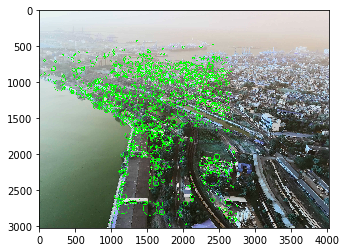

In [2]:
import cv2 as cv
import numpy as np
auto_stitch('images/IMG_6748.HEIC','images/IMG_6749.HEIC')